### **Project 4 **


In this assignment, you will be performing experiments involving regression using the Beijing PM2.5 Data Set:

The hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.
PM2. 5 refers to atmospheric particulate matter (PM) that have a diameter of less than 2.5 micrometers, which is about 3% the diameter of a human hair.
Commonly written as PM2.5, particles in this category are so small that they can only be detected with an electron microscope.
The data set can be found in the UCI Repository:  https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data (Links to an external site.)

Your task is to create a well-documented report using a Google Colab Jupyter notebook to:

1. Perform data scrubbing (handle missing data, normalization, scaling, etc.)
2. Perform linear as well as non-linear regression on the dataset 
3. Evaluate the performance of  each model using k-fold cross validation
4. Plot and compare learning curves for all models 
5. Fully discuss which model performs the best and why
 

[Source: https://royalsocietypublishing.org/doi/full/10.1098/rspa.2015.0257]



# **Import all the required libraries Here:**

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# **imports the CSV dataset using pandas**

In [7]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pandyasagar323/Advance-Machine-Learning-/master/Project%204/PRSA_data_2010.csv'
PRSA_data_2010 = pd.read_csv(url)
PRSA_data_2010.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


# **Let’s explore the data a little bit by checking the number of rows and columns in our datasets.**

In [8]:
PRSA_data_2010.shape

(43824, 13)

In [9]:
PRSA_data_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


# **To see the statistical details of the dataset, we can use describe()**

In [10]:
PRSA_data_2010.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [11]:
# how many object cbwd have.
PRSA_data_2010['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [12]:
PRSA_data_2010["cbwd"].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

Saving figure attribute_histogram_plots


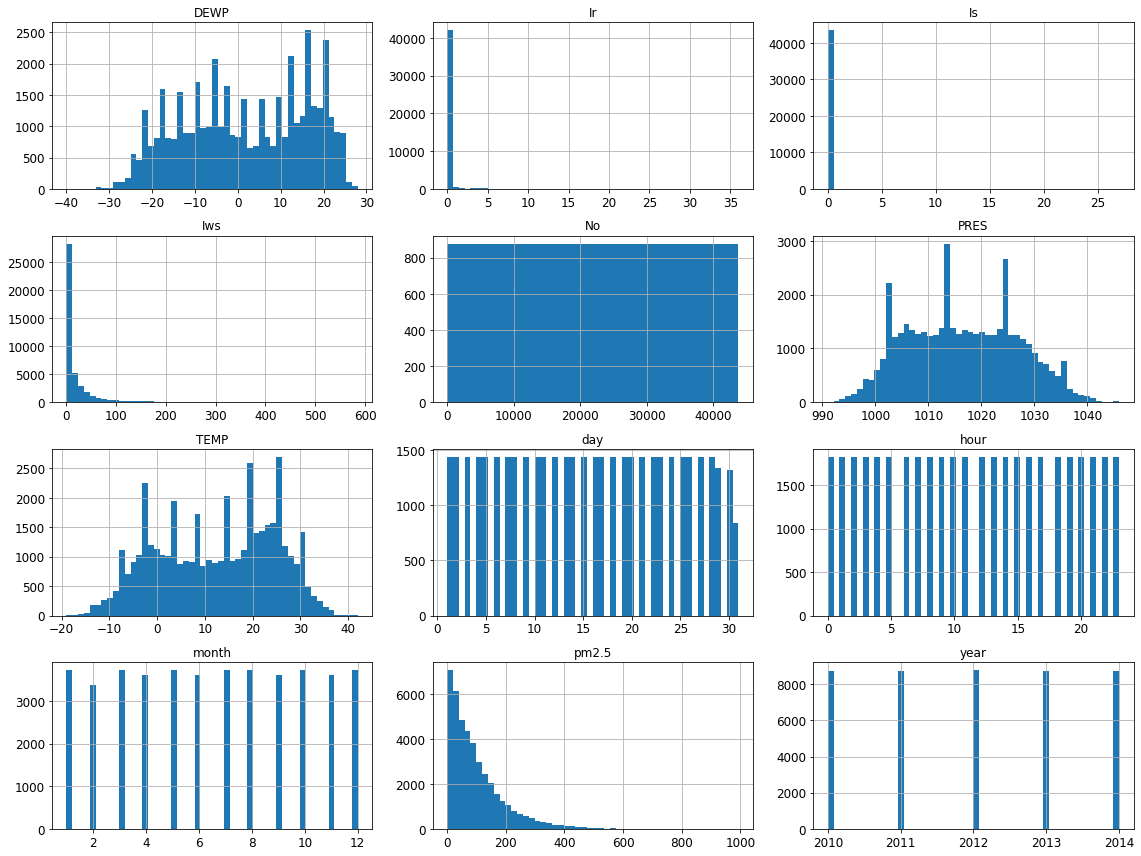

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
PRSA_data_2010.hist(bins=50, figsize=(16,12))
save_fig("attribute_histogram_plots")
plt.show()

**#Convert Here object to int by label encoding.**

In [15]:

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
PRSA_data_2010["cbwd"] = lb_make.fit_transform(PRSA_data_2010["cbwd"])
PRSA_data_2010[["cbwd"]].head(30)
PRSA_data_2010["cbwd"].unique()

array([1, 3, 0, 2])

In [16]:
PRSA_data_2010["cbwd"].value_counts()

2    15290
1    14150
3     9387
0     4997
Name: cbwd, dtype: int64

# Here , NW is converted to 1.and cv is converted to 3 and NE is converted to 0 and SE converted to 2.

In [18]:
PRSA_data_2010.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,1,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,1,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,1,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,1,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,1,12.97,0,0


## **Here is the Correlation of attributes against PM2.5**

In [21]:
corr_matrix=PRSA_data_2010.corr()
corr_matrix["pm2.5"].sort_values(ascending=False)

pm2.5    1.000000
cbwd     0.192094
DEWP     0.165696
day      0.079172
Is       0.020192
year    -0.005805
No      -0.009091
hour    -0.022435
month   -0.024286
PRES    -0.046337
Ir      -0.050135
TEMP    -0.089115
Iws     -0.239623
Name: pm2.5, dtype: float64

In [0]:
#  pm2.5 has the highest correlation with the Classification lable "cbwd" Here.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa406d3b630>,
      dtype=object)

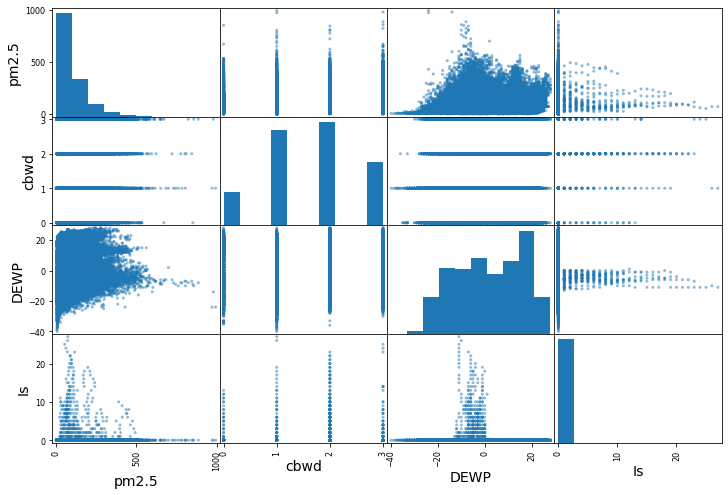

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["pm2.5", "cbwd", "DEWP", "Is"]
scatter_matrix(PRSA_data_2010[attributes],figsize=(12,8))

In [0]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
median = PRSA_data_2010["pm2.5"].median()
median

72.0

In [0]:
PRSA_data_2010["pm2.5"].fillna(median, inplace=True)

# **And finally, let’s plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data using the below script**

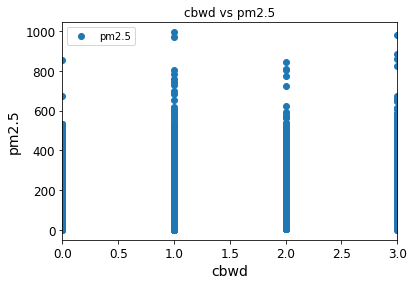

In [26]:
PRSA_data_2010.plot(x='cbwd', y='pm2.5', style='o')  
plt.title('cbwd vs pm2.5')  
plt.xlabel('cbwd')  
plt.ylabel('pm2.5')  
plt.show()

# **Let’s check the average max temperature and once we plot it we can observe that the Average Maximum Temperature is Between Nearly 25 and 35.**

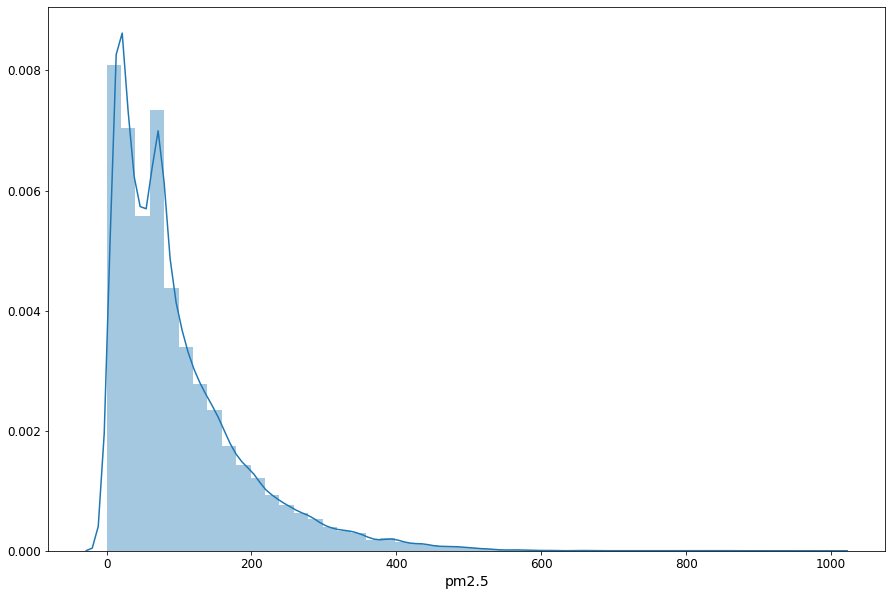

In [27]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(PRSA_data_2010['pm2.5'])

# next step is to divide the data into “attributes” and “labels”.Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the cbwd depending upon the pm2.5 recorded. Therefore our attribute set will consist of the “pm2.5” column which is stored in the X variable, and the label will be the “cbwd” column which is stored in y variable.

In [0]:
X = PRSA_data_2010['cbwd'].values.reshape(-1,1)
y = PRSA_data_2010['pm2.5'].values.reshape(-1,1)

# Next, we split 80% of the data to the training set while 20% of the data to test set using below code.The test_size variable is where we actually specify the proportion of the test set.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [30]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.**

In [31]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[67.38991536]
[[18.15208257]]


In [0]:
y_pred = regressor.predict(X_test)

In [33]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,168.0,85.541998
1,82.0,85.541998
2,307.0,67.389915
3,6.0,67.389915
4,197.0,85.541998
...,...,...
8760,92.0,103.694080
8761,78.0,103.694080
8762,472.0,103.694080
8763,72.0,67.389915


# **As the number of records is huge, for representation purpose I’m taking just 25 records.**

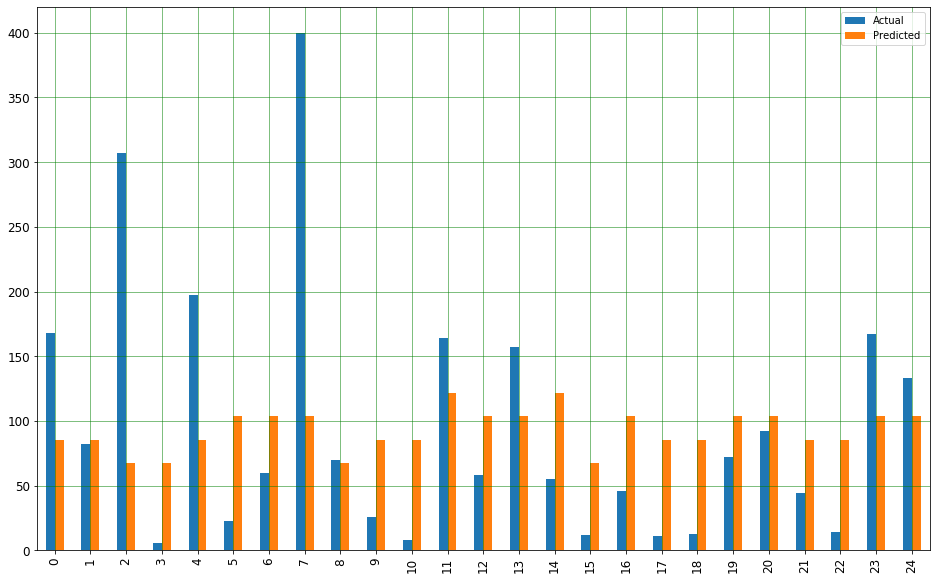

In [34]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# **Here, the predicted percentages are not really close to the actual ones. Now plot our straight line with the test data :**

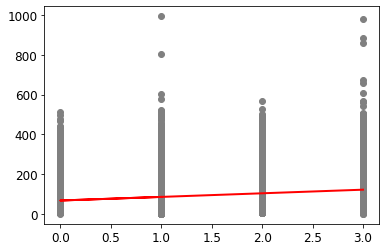

In [35]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 65.39522304592812
Mean Squared Error: 8031.387793986864
Root Mean Squared Error: 89.61801043309801


# **Multiple Linear Regression**

In [0]:
X = PRSA_data_2010[['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd','Iws','Is','Ir']].values
y = PRSA_data_2010['cbwd'].values

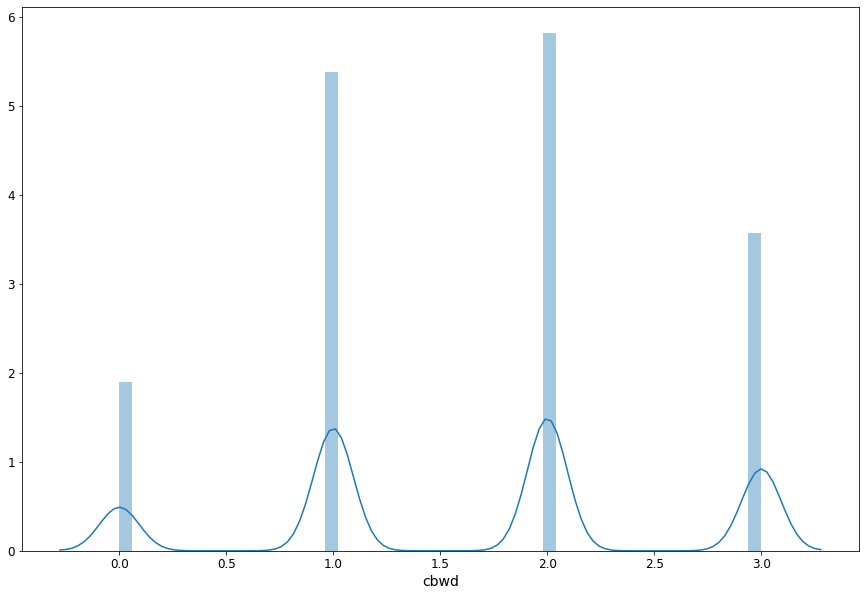

In [39]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(PRSA_data_2010['cbwd'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

1.752649136932405e-10
[ 9.94408759e-18 -8.71958755e-14 -7.30275215e-15 -2.41506034e-16
 -2.96868107e-17 -6.50521303e-19 -7.71951947e-17  9.04224612e-17
  4.17417836e-18  1.00000000e+00 -8.67361738e-19 -6.62786341e-17
  8.39714583e-16]


In [0]:
y_pred = regressor.predict(X_test)

In [51]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df2


,Actual,Predicted
0,1,1.000000e+00
1,1,1.000000e+00
2,0,-2.178181e-15
3,0,-1.198870e-15
4,1,1.000000e+00
...,...,...
8760,2,2.000000e+00
8761,2,2.000000e+00
8762,2,2.000000e+00
8763,0,-9.302906e-17


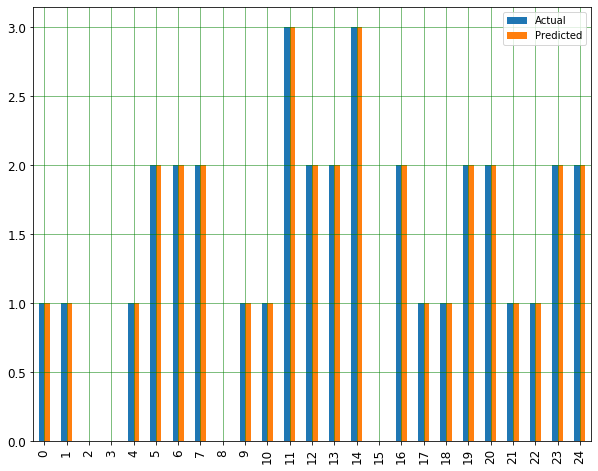

In [47]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# **Here the Bar graph showing the difference between Actual and predicted value**

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0159723882714732e-15
Mean Squared Error: 2.524739870269135e-30
Root Mean Squared Error: 1.5889430040971057e-15


# **You can see that the value of root mean squared error is 1.58  which is slightly greater than 10% of the mean value which is 1.01. This means that our algorithm was not very accurate but can still make reasonably good predictions.**

# **Normal equation graph plot generation.**

Saving figure generated_data_plot


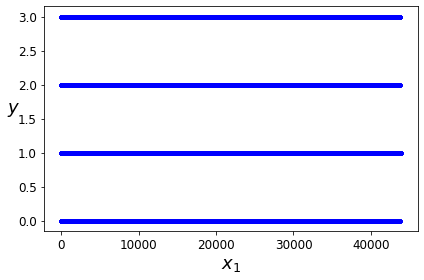

In [54]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
save_fig("generated_data_plot")
plt.show()

### Now Taking two features from the dataset to make visualising and prediction easier for the modelling here.Let's take pm2.5 and cbwd


In [0]:

X = PRSA_data_2010[['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']].values
y = PRSA_data_2010['cbwd'].values

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

In [61]:
X= StandardScaler().fit_transform(X)
X

array([[-1.41460097, -1.60170963, -1.67374446, ..., -0.44189385,
        -0.06935299, -0.13766709],
       [-1.41460097, -1.60170963, -1.67374446, ..., -0.37930644,
        -0.06935299, -0.13766709],
       [-1.41460097, -1.60170963, -1.67374446, ..., -0.34351365,
        -0.06935299, -0.13766709],
       ...,
       [ 1.41460097,  1.58805238,  1.73560822, ...,  4.37533654,
        -0.06935299, -0.13766709],
       [ 1.41460097,  1.58805238,  1.73560822, ...,  4.45572036,
        -0.06935299, -0.13766709],
       [ 1.41460097,  1.58805238,  1.73560822, ...,  4.51830776,
        -0.06935299, -0.13766709]])

# **Preprocessing the numerical attributes**

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

# **CROSS VALIDATION **

In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
from sklearn.metrics import mean_squared_error

Xpredictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, Xpredictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.8867799916663449

In [69]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, Xpredictions)
lin_mae

0.6936445753805747

In [70]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [71]:
Xpredictions = tree_reg.predict(X)
tree_mse = mean_squared_error(y, Xpredictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [73]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.99965771 1.00580111 0.93649606 1.06250042 1.0001141  1.03686058
 1.01382502 1.04355185 1.06133232 1.05799428]
Mean: 1.0218133438623143
Standard deviation: 0.03712977652255907


In [74]:
lin_scores = cross_val_score(lin_reg, y, X,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [nan nan nan nan nan nan nan nan nan nan]
Mean: nan
Standard deviation: nan


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected 2D array, got 1D array instead:
array=[2 3 3 ... 1 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 ... 1 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailed

In [75]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [77]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X, y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.6669782  0.7452287  0.64301228 0.75152758 0.71332901 0.75296482
 0.73371236 0.73079864 0.75875189 0.76033773]
Mean: 0.7256641209296426
Standard deviation: 0.03822660846348624


In [78]:
scores = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.887623
std       0.036678
min       0.812457
25%       0.877290
50%       0.890974
75%       0.913907
max       0.936113
dtype: float64

In [79]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X, y)
Xpredictions = svm_reg.predict(X)
svm_mse = mean_squared_error(y, Xpredictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.8920376104604335

In [82]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(1.6632667031763415,
 array([ 0.02654442, -0.02551991, -0.00132181,  0.08984878,  0.12642605,
         0.17918489,  0.02763133,  0.02663427, -0.10906373,  0.01492366,
        -0.0593961 ]))

In [0]:
X1_pm25 = X[:, [4]]

In [86]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X1_pm25)
X1_pm25[0]

array([-0.28166385])

In [87]:
X_poly[0]

array([-0.28166385,  0.07933452])

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(1.7452557452301178, array([ 0.33399495, -0.08198904]))

Saving figure quadratic_predictions_plot


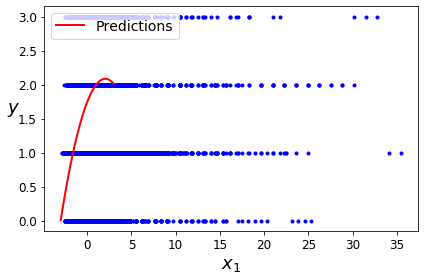

In [89]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

save_fig("quadratic_predictions_plot")
plt.show()

# **Polynomial regression**

In [0]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [115]:

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

I got the error in polynomial Regression because of scaling issue.